In [0]:
import numpy as np
import torch.nn as nn
import torch

In [0]:
class Neural_Network(nn.Module):
    def __init__(self,inputNode=2,hiddenNode = 3, outputNode=1,lmbda  = 0):   
        super(Neural_Network, self).__init__()     
        #Define Hyperparameters
        self.inputLayerSize = inputNode
        self.outputLayerSize = outputNode
        self.hiddenLayerSize = hiddenNode
        self.lmbda = lmbda
        
        # weights
        self.Linear1 = nn.Linear(self.inputLayerSize, self.hiddenLayerSize)
        self.Linear2 = nn.Linear(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        self.z2 = self.Linear1(X) # 3 X 3 ".dot" does not broadcast in PyTorch
        self.a2 = self.sigmoid(self.z2) # activation function
        self.z3 = self.Linear2(self.a2)
        y_hat = self.sigmoid(self.z3) # final activation function
        return y_hat 
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+torch.exp(-z))
    
    def loss(self, yHat, y):
        J = 0.5*sum((y-yHat)**2)
        #!Task 1, acquire the l2_reg term for all model parameters
        #remember model parameters can be accessed with model.parameters
        l2_reg = 0
        for params in self.parameters():
            l2_reg += (params**2).sum()
        
        return J + self.lmbda * l2_reg

In [0]:
def train(NN,X, y,Xt,yt,epoch = 5000,optimizer = None):
    list_loss = []
    list_lossTest = []
    
    for i in range(epoch):
        NN.train()
        
        optimizer.zero_grad()
        
        yHat = NN.forward(X)
        loss = NN.loss(yHat,y)
        
        loss.backward()
        optimizer.step()
        
        if i%100 == 0 : 
            print('Loss {}={}'.format(i,loss.item()))
            
            list_loss.append(loss)
            #check the loss of testing 
            with torch.no_grad(): 
                NN.eval()
                list_lossTest.append(NN.loss(NN.forward(Xt),yt))
        
    return list_loss,list_lossTest


before  tensor([[0.3000, 1.0000],
        [0.5000, 0.2000],
        [1.0000, 0.4000],
        [0.6000, 0.3000]]) tensor([[0.7500],
        [0.8200],
        [0.9300],
        [0.7000]]) = tensor([[0.4863],
        [0.4768],
        [0.4679],
        [0.4754]], grad_fn=<MulBackward0>)
Loss 0=0.2257380336523056
Loss 100=0.015362328849732876
Loss 200=0.014931733720004559
Loss 300=0.014903557486832142
Loss 400=0.014881499111652374
Loss 500=0.01485982071608305
Loss 600=0.014838358387351036
Loss 700=0.014817051589488983
Loss 800=0.014795857481658459
Loss 900=0.014774725772440434
Loss 1000=0.014753592200577259
Loss 1100=0.014732398092746735
Loss 1200=0.014711137861013412
Loss 1300=0.014689705334603786
Loss 1400=0.014668110758066177
Loss 1500=0.01464628241956234
Loss 1600=0.014624196104705334
Loss 1700=0.014601788483560085
Loss 1800=0.014579027891159058
Loss 1900=0.01455586589872837
Loss 2000=0.014532282948493958
Loss 2100=0.014508233405649662
Loss 2200=0.014483681879937649
Loss 2300=0.0144585

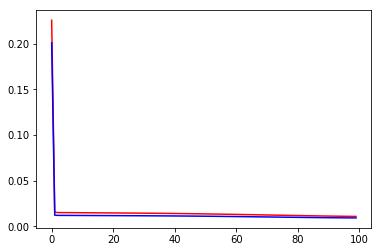

In [0]:

#Training Data:
trainX = np.array(([3,5], [5,1], [10,2], [6,1.5]), dtype=float)
trainY = np.array(([75], [82], [93], [70]), dtype=float)

#Testing Data:
testX = np.array(([4, 5.5], [4.5,1], [9,2.5], [6, 2]), dtype=float)
testY = np.array(([70], [89], [85], [75]), dtype=float)

#Normalize:
trainX = trainX/np.amax(trainX, axis=0)
trainY = trainY/100 #Max test score is 100

#Normalize by max of training data:
testX = testX/np.amax(testX, axis=0)
testY = testY/100 #Max test score is 100

trainX = torch.from_numpy(trainX).float()
trainY = torch.from_numpy(trainY).float()
testX = torch.from_numpy(testX).float()
testY = torch.from_numpy(testY).float()


NN = Neural_Network(lmbda = .001)

optimizer = torch.optim.SGD(NN.parameters(), lr=.1,momentum=.09)

print('before ',trainX,trainY,'=',NN.forward(trainX))

list_loss,list_loss2 = train(NN,trainX,trainY,testX,testY,10000,optimizer)

print('after ',trainX,trainY,'=',NN.forward(trainX))

#!Task 2: Validate your result, by comparing the loss progression.
import matplotlib.pyplot as plt
plt.plot(list_loss, 'r') #train loss - red
plt.plot(list_loss2, 'b') #test loss - blue
plt.show()